In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("/content/train (1) (2).csv")
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [5]:

corr=df.corr()
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)


price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [6]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [7]:

y=df["price_range"].values
x=df.drop(["price_range"],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [8]:
get_ipython().system('pip install yellowbrick')

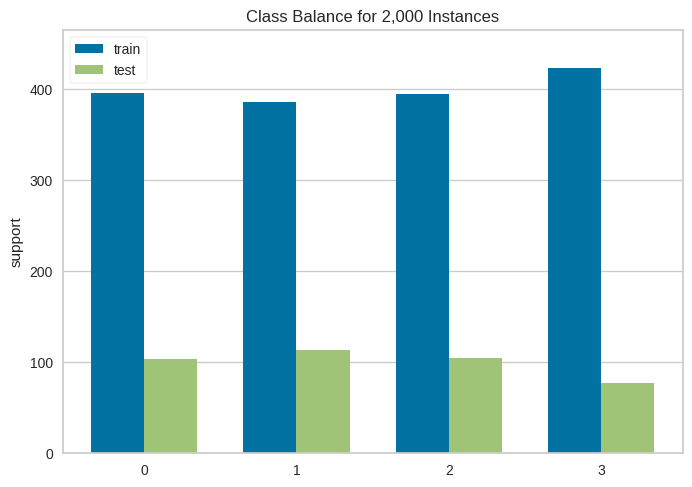

<Axes: title={'center': 'Class Balance for 2,000 Instances'}, ylabel='support'>

In [10]:
from yellowbrick.target import ClassBalance
visualizer= ClassBalance(labels=[0,1,2,3])
visualizer.fit(y_train,y_test)
visualizer.poof()


In [13]:
from sklearn.svm import SVC
svm1 = SVC(random_state=45)
svm1.fit(X_train,y_train
         )
y_pred=svm1.predict(x_test)
print("train accuracy:",svm1.score(x_train,y_test))
print("test accuracy:",svm1.score(x_train,y_test))
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test,y_pred)
print("model accuracy score with default hyperparameters {0:0.4f}".format(acc1))


ValueError: ignored